# Стилизация форм

Формы являются неотъемлемой частью практически любого веб-приложения. Формы имеют отличную функциональность, но стандартный внешний вид. Рассмотрим как можно визуально изменить формы и сделать их удобными для пользователей.

## Ручная Стилизация

### Персонализация полей формы

__Виджеты__ в Django отвечают за отображение полей форм на HTML-странице. Виджеты можно настраивать, чтобы изменить HTML-разметку, которая будет сгенерирована для поля. Для этого переопределяется метод __\_\_init\_\___ формы:

In [ ]:
class ProjectForm(ModelForm):
    
    class Meta:
        model = Project
        fields = ['name', 'description']
        
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.fields['name'].widget.attrs.update({'class': 'my-class'})
        self.fields['description'].widget.attrs.update({'class': 'my-textarea-class'})

В методе __\_\_init\_\___ обновляются атрибуты виджетов __attrs__ поля. __CSS__ классы __my-class__ и __my-textarea-class__ будут применены к соответствующим полям формы.

Изменим шаблон __tasks/project_create.html__:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
<h2>Создать новый проект</h2>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Сохранить</button>
    </form>

    <style>
        .my-class{
            border:1px solid #d97a7a;
            border-radius:5px;
            height:25px;
            width:200px;
            margin: 10px 10px 10px 0;
        }
        .my-textarea-class{
            border:1px solid #6ed0ff;
            border-radius:5px;
            height:25px;
            width:200px;
            margin: 10px 10px 10px 0;
        }
    </style>
{% endblock %}

__CSS__ классы можно прописывать в шаблон напрямую с помощью __\<style>...\</style>__

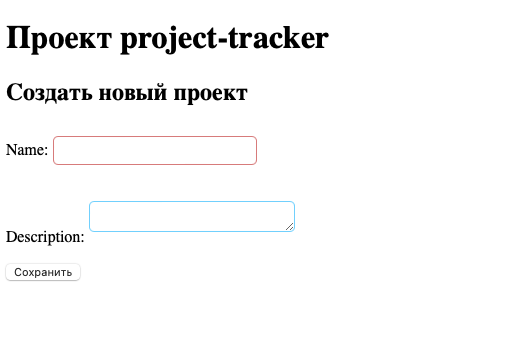

### Ручной рендеринг в шаблонах

Можно контролировать макет формы, рендеря ее вручную в шаблонах:

До этого мы прописывали всю форму в {{...}}:

In [ ]:
{{ form }}

Но аналогично мы можем выводить отдельно каждое поле формы:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
<h2>Создать новый проект</h2>
<form method="post">
    {% csrf_token %}
    {{ form.name.label_tag }}
    <div class="fieldWrapper">
        {{ form.name }}
    </div>
    {{ form.description.label_tag }}
    <div class="fieldWrapper">
        {{ form.description }}
    </div>
    <button type="submit">Submit</button>
</form>

    <style>
        .fieldWrapper{
            border: solid #33c429;
            border-radius:5px;
            width:300px;
        }
    </style>
    
{% endblock %}

или с помощью цикла:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
<h2>Создать новый проект</h2>
<form method="post">
    {% csrf_token %}
    {% for field in form %}
    {{ field.label_tag }}
        <div class="fieldWrapper">
            {{ field }}
        </div>
    {% endfor %}
    <button type="submit">Submit</button>
</form>

    <style>
        .fieldWrapper{
            border: solid #33c429;
            border-radius:5px;
            width:300px;
        }
    </style>
    
{% endblock %}

   * __{% for field in form %}__ цикл проходит через все поля в __form__. Каждое поле (__field__) обрабатывается внутри цикла.
   * При выводе циклом все поля формы будут обернуты в одинаковые __div__ с классом __fieldWrapper__ для стилизации.
   * __{{ field.label_tag }}__ рендерит HTML-метку для поля.
   * __label_tag__ генерирует соответствующий __\<label>__ элемент для поля.
   * __{{ field }}__ рендерит само поле ввода.

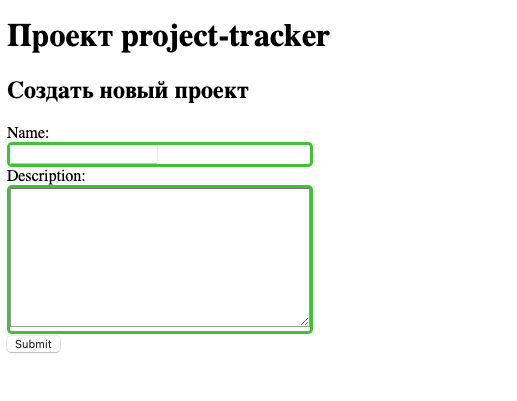

## Использование CSS Фреймворков

__CSS фреймворк__ — это библиотека предварительно написанных __CSS__ стилей, которая помогает быстро и эффективно создавать визуально привлекательные и функциональные веб-интерфейсы. Эти фреймворки содержат набор стилевых правил, сеточных систем (grid systems), компонентов интерфейса и JavaScript-расширений для улучшения интерактивности.

### Основные характеристики CSS Фреймворков

1. __Сеточная Система (Grid System)__: Большинство CSS фреймворков предлагают гибкую систему сеток, которая позволяет легко создавать адаптивные макеты страниц.
2. __Готовые Компоненты и Элементы Дизайна__: Фреймворки предлагают широкий спектр предварительно стилизованных компонентов, таких как кнопки, формы, навигационные панели, модальные окна и многие другие. Это значительно ускоряет процесс разработки, поскольку не требуется создавать каждый элемент с нуля.
3. __Кроссбраузерность и Совместимость__: Фреймворки обычно гарантируют, что все их компоненты будут корректно отображаться в различных браузерах, что уменьшает необходимость в ручном тестировании и корректировке стилей.
4. __Настройка и Расширяемость__: Многие фреймворки позволяют настроить их стили, чтобы соответствовать уникальным требованиям проекта. Также можно расширять их функциональность, добавляя новые стили или компоненты.
5. __Использование Препроцессоров CSS__: Некоторые фреймворки построены с использованием препроцессоров CSS (например, SASS или LESS), что делает их более гибкими и мощными в плане настройки.

### Популярныe CSS Фреймворки:

   * __Bootstrap__: Один из самых популярных фреймворков, предлагающий обширный набор компонентов и удобную сеточную систему.
   * __Foundation__: Фреймворк, ориентированный на профессиональных разработчиков, с большими возможностями кастомизации.
   * __Materialize__: Фреймворк, основанный на __Material Design от Google__, предлагающий стильные и интерактивные элементы интерфейса.
   * __Bulma__: Современный CSS фреймворк, который полностью написан с использованием Flexbox и фокусируется на гибкости.

Использование CSS фреймворков значительно упрощает процесс разработки веб-интерфейсов, позволяя разработчикам сосредоточиться на создании уникальных функций и дизайна, вместо того чтобы тратить время на базовую стилизацию и сеточные раскладки.

### Интеграция Bootstrap

__Bootstrap__ - популярный CSS фреймворк, который может быть использован для стилизации форм в Django.

Для использования Bootstrap, необходимо подключить его __CSS__ в шаблонах:

In [ ]:
<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">

После подключения можно использовать классы Bootstrap для стилизации форм:

In [ ]:
class ProjectForm(ModelForm):
    
    class Meta:
    model = Project
    fields = ['name', 'description']
        
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        for field in self.fields.values():
            field.widget.attrs['class'] = 'form-control'

Изменим шаблон __tasks/project_create.html__:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
<h2>Создать новый проект</h2>
<form method="post">
    {% csrf_token %}
    {% for field in form %}
        {{ field.label_tag }}
        {{ field }}

    {% endfor %}
    <button type="submit">Submit</button>
</form>

{% endblock %}

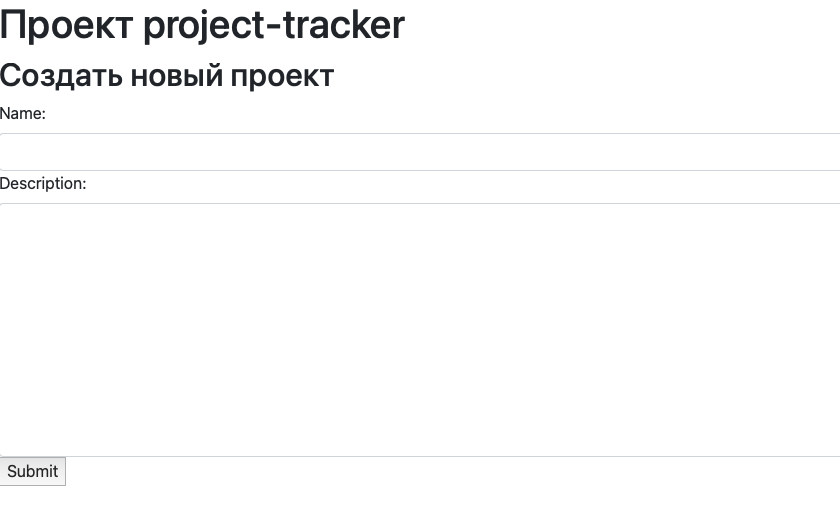

## Django Crispy Forms

__Crispy Forms__ — это Django-приложение для улучшения рендеринга форм.

Установка осуществляется через:

In [ ]:
pip install django-crispy-forms

и его необходимо добавить в __INSTALLED_APPS__ в файле __settings.py__:

In [ ]:
INSTALLED_APPS = [
    # ...
    'crispy_forms',
    # ...
]

__Django Crispy Forms__ мы будем сочетать с __Bootstrap__, поэтому установим дополнительно:

In [ ]:
pip install crispy-bootstrap4

и добавим в __INSTALLED_APPS__ в файле __settings.py__:

In [ ]:
INSTALLED_APPS = [
    # ...
    'crispy_forms',
    'crispy_bootstrap4',
    # ...
]

В __settings.py__ нужно указать используемый пакет стилей, например, для __Bootstrap 4__:

In [ ]:
CRISPY_TEMPLATE_PACK = 'bootstrap4'

__Crispy Forms__ позволяет легко рендерить формы со стилями Bootstrap или других фреймворков:

In [ ]:
from crispy_forms.helper import FormHelper
from crispy_forms.layout import Submit, Layout, Field

class ProjectForm(ModelForm):
    
    class Meta:
        model = Project
        fields = ['name', 'description']

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.helper = FormHelper()
        self.helper.layout = Layout(
            Field('name', css_class='form-control'),
            Field('description', css_class='form-control', rows=3),
            Submit('submit', 'Submit', css_class='btn btn-primary')
        )

В методе __\_\_init_\___ инициализируется базовый класс, а затем создаем экземпляр __FormHelper__. __FormHelper__ из __Crispy Forms__ позволяет управлять отображением формы.

С помощью __Layout__ определяется макет формы:
   * __Field('name', css_class='form-control')__: Определяет поле ввода для __name__ с Bootstrap классом '__form-control__'.
   * __Field('description', css_class='form-control', rows=3)__: Определяет многострочное текстовое поле (__textarea__) для __description__ с тремя строками (__rows=3__) и Bootstrap классом '__form-control__'.
   * __Submit('submit', 'Submit', css_class='btn-primary')__: Создает кнопку отправки формы с текстом '__Submit__' и Bootstrap классом '__btn-primary__'.

Изменим шаблон создания проекта __tasks/project_create.html__:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
{% load crispy_forms_tags %}
<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">


<h2>Создать новый проект</h2>
<form method="post">
    {% csrf_token %}
    {% crispy form %}
</form>

{% endblock %}

   * __{% load crispy_forms_tags %}__ загружает теги __Crispy Forms__ для использования в шаблоне.
   * __{% crispy form %}__ автоматически рендерит форму с применением стилей __Bootstrap__.

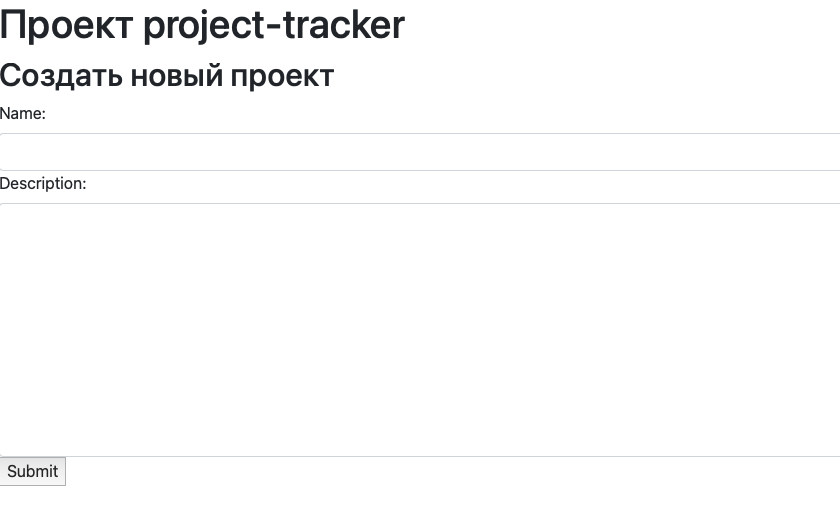